# Plan :
#### I - Quelles apps utilisent des trackers de la catégorie "Location" ?
#### II - Quels sont les trackers de localisation les plus utilisés ?
#### III - L'indice de Herfindahl Hirschmann
#### IV - Occurence des trackers de localisation par date de création

# II - Quelles apps utilisent des trackers de la catégorie "Location" ?
Nous allons ici créer le fichier app_using_loc_trackers.csv qui repertorie toutes les applications qui utilisent des trackers de la catégorie "Location".

In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
trackers = pd.read_csv(
    "./Data/Trackers_location.csv", quotechar='"', skipinitialspace=True, low_memory=False)

Si app_trackers/Work/Data/EP_Data_Extended.csv n'est pas présent, mais que app_trackers/Work/Data/app_using_loc_trackers.csv est déjà présent, passer directement au II.

In [3]:
applications = pd.read_csv(
    "./Data/EP_Data_Extended.csv", quotechar='"', skipinitialspace=True, low_memory=False)

In [4]:
trackers_id = trackers["id"].tolist() #on met le numéro des trackers de localisation dans une liste
#print('trackers_id = ', trackers_id)

In [5]:
applications_filtered = {'DataSetId': [],
                         'app_name': [],
                         'handle': [],
                         'creator': [],
                         'trackers': []} #dictionnaire des applications qui contiennent trackers de loc
#print('trackers_id = ', applications_filtered)

In [6]:
for app in tqdm(range(applications.shape[0])):
    trackers_app = str(applications.iloc[app]['trackers']).split(',') #récupérer les numeros des trackers contenus dans les app
    trackers_app = [nbr for nbr in trackers_app if nbr!='nan']
    try:
        trackers_app = [int(nbr) for nbr in trackers_app]
    except:
        pass
    already_added=False
    for tracker in trackers_app:
        if (tracker in trackers_id) and (already_added==False): #si l'app contient un des numéro de notre liste
            applications_filtered['DataSetId'].append(applications.iloc[app]['DataSetId']) #on récupère toutes les infos de l'app dans notre dictionnaire
            applications_filtered['app_name'].append(applications.iloc[app]['app_name'])
            applications_filtered['handle'].append(applications.iloc[app]['handle'])
            applications_filtered['creator'].append(applications.iloc[app]['creator'])
            applications_filtered['trackers'].append(applications.iloc[app]['trackers'])
            already_added=True

100%|████████████████████████████████████████████████████████████████████████████████████████| 195307/195307 [01:30<00:00, 2164.45it/s]


In [7]:
applications_filtered = pd.DataFrame(data=applications_filtered)

In [8]:
applications_filtered

,DataSetId,app_name,handle,creator,trackers
0,100571,PayByPhone,com.paybyphone,PayByPhone Technologies Inc.,"26,12,17,27,48,105,219,85,55,312,49"
1,188423,Viber Messenger,com.viber.voip,Viber Media S.à r.l.,"17,27,48,52,105,135,312,49,118,382"
2,70688,Météo-France,fr.meteo,Météo-France,"25,27,35,37,31,88,48,65,7,92,89,105,106,121,72..."
3,160317,Marmiton : Recettes gourmandes,com.aufeminin.marmiton.activities,aufeminin.com,"36,12,23,40,1,25,27,35,48,56,66,61,65,67,70,7,..."
4,149436,"Groupon - Shop Deals, Discounts & Coupons",com.groupon,"Groupon, Inc.","27,66,67,70,127,181,312"
...,...,...,...,...,...
14425,101320,Paxful,com.paxful.wallet,NaN,"17,62,125,291,207,49,118,344"
14426,69537,Luno,co.bitx.android.wallet,NaN,"27,28,66,67,70,48,18,105,251,49"
14427,86888,HBO Max,com.hbo.hbonow,NaN,"17,312,49"
14428,170623,My Data Manager,com.mobidia.android.mdm,NaN,"28,12,27,66,67,69,70,49"


In [9]:
applications_filtered.to_csv(r'/Users/emmabourdit/Desktop/app_trackers/Work/Data/App_using_loc_trackers.csv', index = False)
#on converti applications_filtered dans un csv

# II - Quels sont les trackers de localisation les plus utilisés ?

In [10]:
applications_filtered = pd.read_csv(
    "./Data/App_using_loc_trackers.csv", quotechar='"', skipinitialspace=True, low_memory=False)

In [11]:
trackers_appli = applications_filtered.loc[:, "trackers"] #on prend les numeros des trackers dans chaque app de applications_filtered

In [12]:
trackers_appli = trackers_appli.values.tolist() #on met dans une liste
#print(trackers_appli)

In [13]:
most_used_trackers= pd.DataFrame(trackers_id) #on fait un df de trackers_id qui contient les numero des trackers loc
#print(most_used_trackers) #il y a 56 trackers de lcoalisation

In [14]:
def count_nbr_list(listt, tracker_nb): #nous renvoie le nbr doccur de tracker_nb dans la liste listt
    sum = 0
    str1=str(tracker_nb)
    for i in range(0, len(listt)):
        str2=","+str1+","
        sum = sum + listt[i].count(str2)
        j = 0
        while (j < len(str1) and j<len(listt[i]) and listt[i][j] == str1[j]):
            j=j+1
        if (j == len(str1) and j<len(listt[i]) and listt[i][j] == ","):
            sum=sum+1
        j = len(listt[i]) - len(str1)
        x = 0
        while (j+x<len(listt[i]) and listt[i][j+x] == str1[x]):
            x=x+1
        if x==len(str1):
            sum=sum+1
        #print('sum =', sum)
    return(sum)

list_trackers_use = []  #nbre d'apps qui utilisent chaque tracker de loc
for j in range (0,56): #on parcours la liste des numero de trackers
    sum=0
    sum=count_nbr_list(trackers_appli, trackers_id[j])
    list_trackers_use.append(sum) #append ajoute un elt a une liste. Ajoute le nbr dapp qui utilisent le tracker a la liste
#print(trackers_appli)
print(list_trackers_use)

[3817, 1363, 66, 224, 606, 101, 206, 190, 1025, 111, 398, 35, 62, 77, 94, 67, 53, 76, 74, 77, 10, 42, 49, 144, 55, 52, 17, 53, 30, 878, 71, 6, 3567, 100, 3, 3, 416, 78, 573, 82, 1, 694, 47, 8, 5, 10, 6, 12, 1, 308, 66, 99, 37, 40, 394, 43]


In [15]:
trackers['Occurrence'] = list_trackers_use #ajoute une colonne occurence au .csv des trackers de loc
#list_trackers_use

In [16]:
trackers = trackers[['id','name','categories','Occurrence','code_signature','creation_date','network_signature','website']]

In [17]:
trackers=trackers.sort_values('Occurrence', ascending=False) #trie du tracker de loc le plus utilisé au moins utilisé

In [18]:
trackers

,id,name,categories,Occurrence,code_signature,creation_date,network_signature,website
0,17,Braze (formerly Appboy),"['Analytics', 'Advertisement', 'Location']",3817,com.appboy,2017-09-24,appboy\.com,https://www.braze.com
32,333,Huawei Mobile Services (HMS) Core,"['Analytics', 'Advertisement', 'Location']",3567,com.huawei.hms.analytics|com.huawei.hms.locati...,2020-11-25,NaN,https://developer.huawei.com/consumer/en/hms
1,28,LeanPlum,"['Analytics', 'Profiling', 'Location']",1363,com.leanplum.,2017-09-24,leanplum\.com,https://www.leanplum.com/
8,174,CleverTap,"['Analytics', 'Profiling', 'Location']",1025,com.clevertap.,2019-03-10,wzrkt\.com,https://clevertap.com/
29,320,Verizon Ads,"['Analytics', 'Profiling', 'Identification', '...",878,com.verizon.ads|com.verizondigitalmedia.mobile...,2020-09-19,NaN,https://www.verizonmedia.com/
41,361,AutoNavi / Amap,['Location'],694,com.amap.api,2021-02-28,grid\.amap\.com|tm\.amap\.com|mst[0-9]*\.is\.a...,https://mobile.amap.com/
4,57,Cuebiq,"['Analytics', 'Location']",606,com.cuebiq.cuebiqsdk.model.Collector|com.cuebi...,2017-12-03,cuebiq\.com,http://www.cuebiq.com/
38,354,X-Mode,"['Analytics', 'Location']",573,io.xmode.BcnConfig|io.xmode.locationsdk|io.mysdk.,2021-01-24,api\.myendpoint\.io|bin5y4muil\.execute-api\.u...,https://xmode.io/
36,352,Opensignal,"['Analytics', 'Location']",416,com.opensignal.datacollection.,2021-01-24,NaN,https://www.opensignal.com
10,192,Swrve,"['Analytics', 'Profiling', 'Location']",398,com.swrve.sdk,2019-04-15,api\.swrve\.com|content\.swrve\.com,https://www.swrve.com/


On voit que les trois trackers les plus utilisés sont 17, 333, 28

# Histogrammes des trackers "Location" les plus utilisés

In [19]:
import plotly.express as px #conda install -c plotly plotly_express
import plotly.graph_objects as pxo
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib

In [20]:
most_used=trackers.head(15)

/var/folders/_2/hh8qd4212f5dc2htb0k81hm00000gn/T/ipykernel_23961/4204750580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_used['id']=most_used['id'].astype(str)


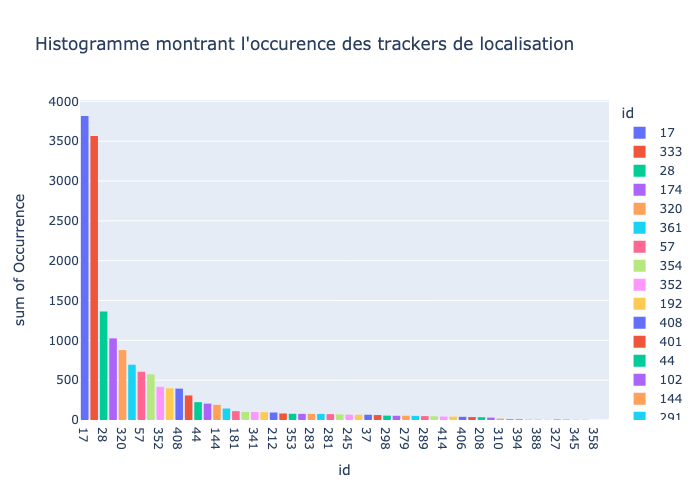

In [21]:
most_used['id']=most_used['id'].astype(str)
most_used["id"].astype("category")
trackers['id']=trackers['id'].astype(str)
trackers["id"].astype("category")

fig = px.histogram(trackers, 
             x="id", 
             y="Occurrence", 
             color="id", 
             title="Histogramme montrant l'occurence des trackers de localisation")
fig.show("png")

<AxesSubplot:xlabel='name'>

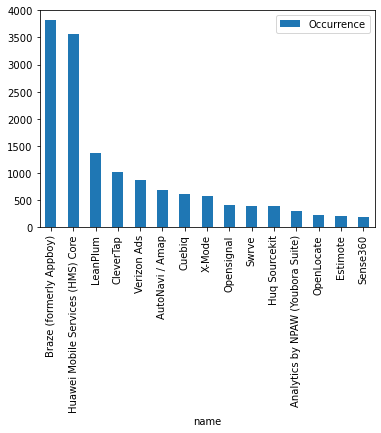

In [22]:
most_used.plot.bar(x="name", y="Occurrence")
#plt.savefig('Location_trackers_histogramme.png')

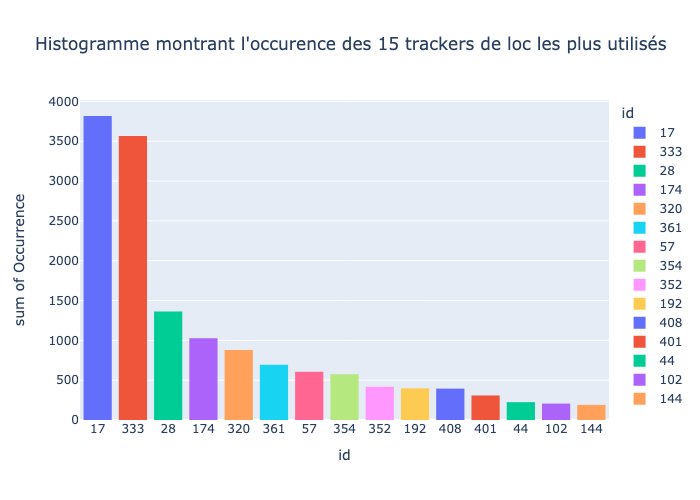

In [23]:
fig = px.histogram(most_used, 
             x="id", 
             y="Occurrence", 
             color="id", 
             title="Histogramme montrant l'occurence des 15 trackers de loc les plus utilisés")
fig.show("png")

In [39]:
dates_df = applications
dates_df['created'] = applications['created'].apply(lambda x: x.split('T')[0]) #split la variable created
dates_df['created'] = dates_df['created'].map(lambda x: str(x)[:-3]) #supp 3 derniers caracteres
dates = dates_df['created'] # on met dans une liste nos dates
dates = list(dict.fromkeys(dates)) #enlève les doublons
#dates_df

In [40]:
len(dates_df['created']) #195307
len(dates) #1370
finaly = pd.DataFrame(dates, columns = ['Dates'])
#finaly

In [26]:
###################  cette partie a servi a créer la bdd Occurrence_in_time.csv ###################

#def count_nbr_string(string, tracker_nb): #nous renvoie le nbr doccur de tracker_nb dans la liste listt
#    sum2 = 0
#    str1=str(tracker_nb)
#    str2=","+str1+","
#    sum2 = sum2 + string.count(str2)
#    j = 0
#    while (j < len(str1) and j<len(string) and string[j] == str1[j]):
#        j=j+1
#    if (j == len(str1) and j<len(string) and string[j] == ","):
#        sum2=sum2+1
#    j = len(string) - len(str1)
#    x = 0
#    while (j>0 and j+x<len(string) and x>len(str1) and string[j+x] == str1[x]): ####erreur
#        x=x+1
#    if x==len(str1):
#        sum2=sum2+1
#    return(sum2)

#def occur_by_date(j, tracker_nb): #nous renvoie le nbr doccur du tracker_nb à la date j
#    occur = 0
#    find = 0
#    for i in range(0, len(dates_df['created'])-1):
#        while str(dates_df['created'][i]) == str(dates[j]) and i<len(dates_df['created'])-1:
#            find = 1
#            occur = occur + count_nbr_string(str(dates_df['trackers'][i]), tracker_nb)
#            i = i + 1
#        if find == 1:
#            break
#        i = i + 1
#    return(occur)
#
#def list_of_occur(tracker_nb, recup): #nous renvoie la liste avec la colonne d'occur pour le tracker j
#    occur = 0
#    for i in range(0, len(dates)):
#        occur = occur_by_date(i, tracker_nb)
#        recup.append(occur)
#        i = i + 1
#    return(recup)

#for i in range (0,len(trackers_id)): # pour chaque tracker on rempli la colonne
#    tracker_nb = trackers_id[i]
#    recup = []*len(dates)
#    list_of_occur(tracker_nb, recup)
#    name=str(trackers_id[i])
#    print('tracker nb = ', tracker_nb, 'OK')
#    finaly.insert(i, column=name, value=recup)
#finaly.to_csv(r'/Users/emmabourdit/Desktop/app_trackers/Work/Data/Occurrence_in_time.csv', index = False) #on converti finaly dans un csv

In [47]:
Occurrence_in_time = pd.read_csv(
    "./Data/Occurrence_in_time.csv", quotechar='"', skipinitialspace=True, low_memory=False)

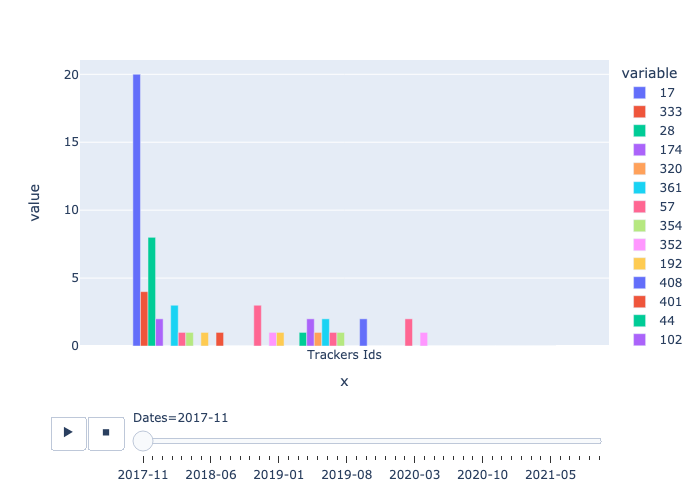

In [48]:
fig = px.bar(Occurrence_in_time, x=px.Constant('Trackers Ids'), y=['17','333','28','174','320','361','57','354',\
                                                       '352','192','408','401','44','102',\
                                                       '144','291','181','77','341','404',\
                                                       '212','357','353','210','283','280',\
                                                       '281','323','245','402','37','209',\
                                                       '298','313','279','307','289','387',\
                                                       '414','285','406','405','208','315',\
                                                       '310','397','394','284','388','396'\
                                                       ,'327','389','345','351','358','398'],\
             animation_frame='Dates')
fig.update_layout(barmode='group')
#fig.show() #décommenter pour avoir le graph dynamique
fig.show("png") #commenter pour avoir le graph dynamique
#### ca prend qqes secondes à charger

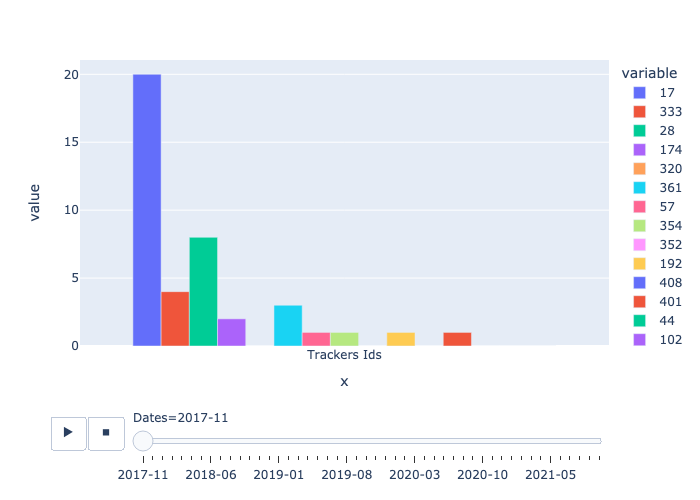

In [49]:
fig = px.bar(Occurrence_in_time, x=px.Constant('Trackers Ids'), y=['17','333','28','174','320','361','57','354',\
                                                       '352','192','408','401','44','102',\
                                                       '144'],animation_frame='Dates')
fig.update_layout(barmode='group')
#fig.show() #décommenter pour avoir le graph dynamique
fig.show("png") #commenter pour avoir le graph dynamique
#### ca prend qqes secondes a charger

# III- Indice de Herfindahl Hirschmann

In [50]:
total_market=trackers["Occurrence"].sum()

In [51]:
trackers['Market_shares'] = trackers["Occurrence"]/total_market

In [52]:
squared_shares = trackers["Market_shares"]*100
squared_shares**=2

In [53]:
IHH_index=squared_shares.sum()

In [54]:
IHH_index

1180.6910136209283

IHH compris entre 1000 et 2000: zone intermédiaire, pouvant présenter des risques en présence de certains facteurs.

# III - Occurence des trackers de localisation par date de création

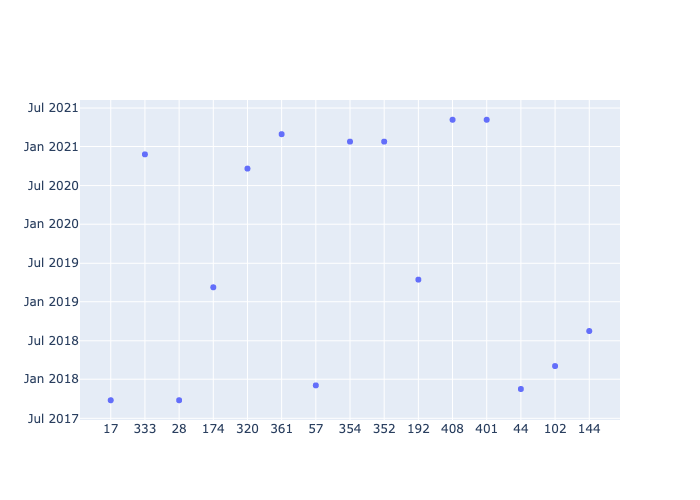

In [55]:
fig = pxo.Figure(data=[pxo.Scatter( 
    x =most_used.id, 
    y =most_used.creation_date,
    mode = 'markers',)])
fig.show("png")

In [56]:
trackers_sorted_date=trackers.sort_values('creation_date', ascending=True)
trackers_sorted_date

,id,name,categories,Occurrence,code_signature,creation_date,network_signature,website,Market_shares
0,17,Braze (formerly Appboy),"['Analytics', 'Advertisement', 'Location']",3817,com.appboy,2017-09-24,appboy\.com,https://www.braze.com,0.228262
1,28,LeanPlum,"['Analytics', 'Profiling', 'Location']",1363,com.leanplum.,2017-09-24,leanplum\.com,https://www.leanplum.com/,0.081509
2,37,Vectaury,"['Analytics', 'Profiling', 'Location']",66,io.vectaury.,2017-09-28,vectaury\.io,http://vectaury.io/,0.003947
3,44,OpenLocate,['Location'],224,com.safegraph.|com.openlocate,2017-11-16,api\.safegraph\.com,https://www.safegraph.com/,0.013396
4,57,Cuebiq,"['Analytics', 'Location']",606,com.cuebiq.cuebiqsdk.model.Collector|com.cuebi...,2017-12-03,cuebiq\.com,http://www.cuebiq.com/,0.036240
5,77,HyperTrack,['Location'],101,com.hypertrack|com.hypertracklive.|io.hypertrack,2018-01-05,api\.hypertrack\.com|hypertrack\.amazonaws\.co...,http://hypertrack.com,0.006040
6,102,Estimote,"['Analytics', 'Location']",206,com.estimote.,2018-03-04,.*\.estimote\.com,https://estimote.com/,0.012319
7,144,Sense360,"['Analytics', 'Location']",190,com.sense360.android.,2018-08-16,android-quinoa-config-prod\.sense360eng\.com|i...,https://sense360.com/,0.011362
8,174,CleverTap,"['Analytics', 'Profiling', 'Location']",1025,com.clevertap.,2019-03-10,wzrkt\.com,https://clevertap.com/,0.061296
9,181,Pilgrim by Foursquare,['Location'],111,com.foursquare.pilgrim|com.foursquare.pilgrims...,2019-03-19,sdk\.foursquare\.com,https://enterprise.foursquare.com/products/pil...,0.006638


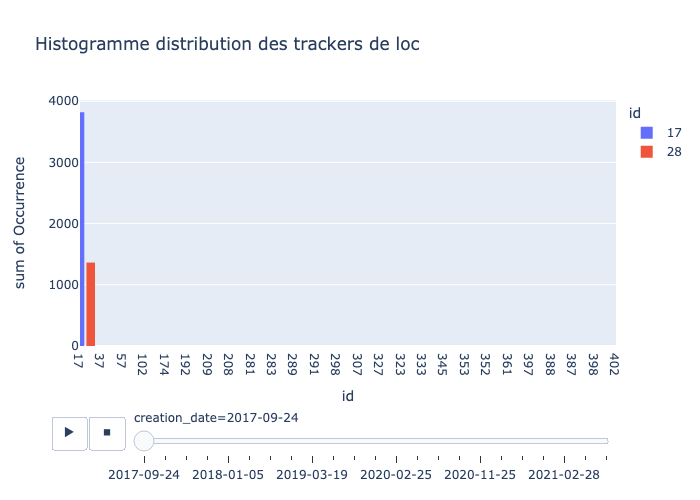

In [57]:
fig = px.histogram(trackers_sorted_date, 
             x="id", 
             y="Occurrence", 
             color="id", 
             animation_frame="creation_date",
             range_x=[0,50],
             title="Histogramme distribution des trackers de loc")
#fig.show() #décommenter pour avoir le graph dynamique
fig.show("png") #commenter pour avoir le graph dynamique

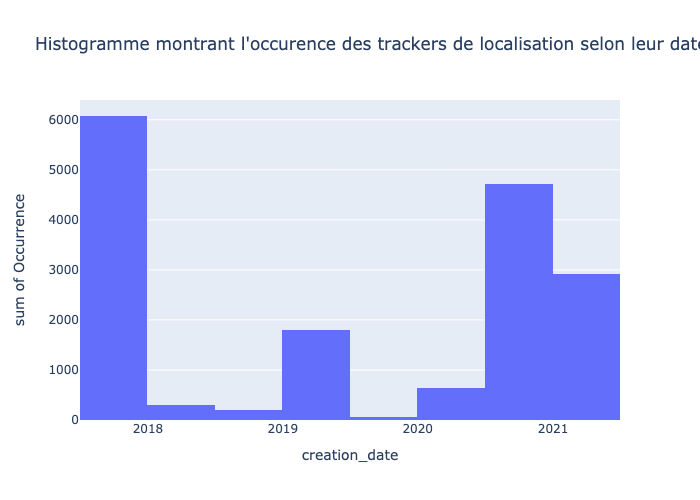

In [58]:
#trackers[["creation_date"]] = trackers[["creation_date"]].apply(pd.to_datetime)
fig = px.histogram(trackers, 
             x="creation_date", 
             y="Occurrence",
             #color="creation_date",
             #nbins="10",
             title="Histogramme montrant l'occurence des trackers de localisation selon leur date de création")
#fig.update_xaxes(type='category')
fig.show("png")

In [59]:
#récupérer l'ordre d'entrée sur le marché
trackers=trackers.sort_values('creation_date')
trackers.reset_index(drop=True)
trackers['market_entry'] = trackers.index
trackers['market_entry'] = trackers['market_entry'].astype(float)
trackers=trackers.sort_values('Occurrence', ascending=False)

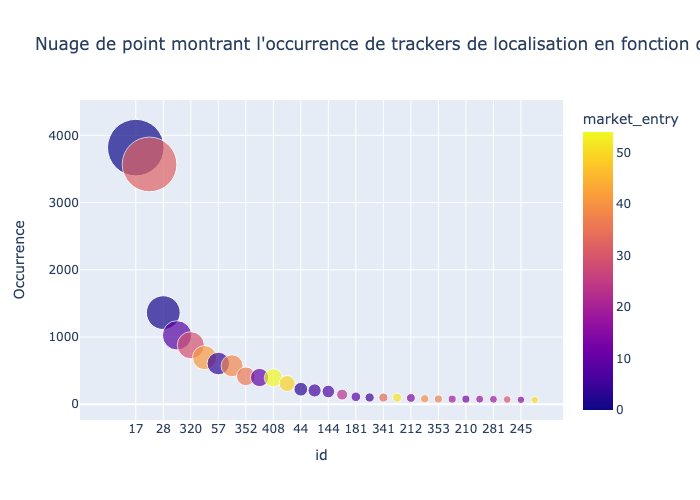

In [62]:
fig = px.scatter(trackers.head(30), 
             x="id", 
             y="Occurrence", 
             color="market_entry",
             size="Occurrence",
             size_max=40,
             title="Nuage de point montrant l'occurrence de trackers de localisation en fonction de l'entrée sur le marché")
fig.show("png")